In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize']=(6,6)
#plt.rcParams['font.weight']='bold'
#plt.rcParams['axes.labelweight']='bold'
#plt.rcParams['lines.linewidth']=1.5
#plt.rcParams['lines.markeredgewidth']=2
%matplotlib inline
%config InlineBackend.figure_format = "retina"

sys.path.append('/Applications/OpenFUSIONToolkit/python')
from OpenFUSIONToolkit.TokaMaker import TokaMaker
from OpenFUSIONToolkit.TokaMaker.meshing import load_gs_mesh, gs_Domain
from OpenFUSIONToolkit.TokaMaker.util import create_isoflux, read_eqdsk

from omfit_classes.omfit_eqdsk import boundaryShape

In [2]:
def resize_polygon(points, dx):
    new_points = np.empty(np.shape(points))
    for i in range(np.shape(points)[0]):
        if i==0:
            last = points[-1,:]
            next = points[i+1,:]
        elif i == np.shape(points)[0]-1:
            last = points[i-1,:]
            next = points[0,:]
        else:
            next = points[i+1,:]
            last = points[i-1,:]
        par = points[i,:]-last
        par/= np.linalg.norm(par)
        perp = np.array([par[1], -par[0]])
        temp = points[i,:] + perp*dx
        par_2 = next-points[i,:]
        par_2/= np.linalg.norm(par_2)
        perp_2 = [par_2[1], -par_2[0]]
        new_points[i, :] = temp + dx/np.dot(perp_2,par)*par  + par*dx/np.dot(par_2,perp)*np.dot(par_2,par)
    return new_points

def corners(r,z,dr,dz):
    rs = np.array([r+dr/2, r+dr/2, r-dr/2, r-dr/2, r+dr/2])
    zs = np.array([z+dz/2, z-dz/2, z-dz/2, z+dz/2, z+dz/2])
    return np.column_stack((rs,zs))

def place_points(npoints, arc):
    arclength = np.zeros(np.size(arc[:,0]))
    for i,point in enumerate(arc):
        if i==0:
            arclength[i] = 0
        else:

            arclength[i] = arclength[i-1] + ((arc[i,0]-arc[i-1,0])**2+(arc[i,1]-arc[i-1,1])**2)**0.5

    spacing = arclength[-1]/npoints
    curr = 1
    inds = [0]
    locs = [arc[0,:]]
    for i, point in enumerate(arc):
        if(arclength[i]>curr*spacing and curr<npoints):
            inds.append(i)
            locs.append(arc[i])
            curr+=1
    return np.array(inds), np.array(locs)

In [3]:
r,z,zeff= boundaryShape(kapu = 1.55, kapl = 1.55, delu = -0.4, dell = -0.4, zetail = -.03, zetaiu = -.03, zetaou = -.03, zetaol = -.03, a = 0.413, eps = 0.413/1.02, zoffset = 0, upnull = False, lonull = False, npts = 8)
lim1 = np.column_stack((r,z))

lim2 = resize_polygon(lim1, -0.05)
vv2 = resize_polygon(lim2, 0.01)

In [4]:
lim2 = np.array([[ 1.36295616,  0.        ],
       [ 1.35819627,  0.1136394 ],
       [ 1.34411987,  0.22839392],
       [ 1.32147837,  0.33535708],
       [ 1.29160087,  0.428733  ],
       [ 1.25659351,  0.50348616],
       [ 1.21989537,  0.55532746],
       [ 1.18721657,  0.58207902],
       [ 1.16129551,  0.58932473],
       [ 1.0702428 ,  0.57841675],
       [ 0.97292215,  0.544273  ],
       [ 0.88082552,  0.48851609],
       [ 0.79867131,  0.41333246],
       [ 0.73043826,  0.32194035],
       [ 0.67936479,  0.2185339 ],
       [ 0.64782749,  0.10834806],
       [ 0.63723823,  0.        ],
       [ 0.64782749, -0.10834806],
       [ 0.67936479, -0.2185339 ],
       [ 0.73043826, -0.32194035],
       [ 0.79867131, -0.41333246],
       [ 0.88082552, -0.48851609],
       [ 0.97292215, -0.544273  ],
       [ 1.0702428 , -0.57841675],
       [ 1.16129551, -0.58932473],
       [ 1.18721657, -0.58207902],
       [ 1.21989537, -0.55532746],
       [ 1.25659351, -0.50348616],
       [ 1.29160087, -0.428733  ],
       [ 1.32147837, -0.33535708],
       [ 1.34411987, -0.22839392],
       [ 1.35819627, -0.1136394 ]])

vv2 = np.array([[ 1.37296493e+00, -1.38777878e-17],
       [ 1.36817072e+00,  1.14458731e-01],
       [ 1.35399275e+00,  2.30041200e-01],
       [ 1.33115684e+00,  3.37922814e-01],
       [ 1.30092944e+00,  4.32392306e-01],
       [ 1.26527112e+00,  5.08535482e-01],
       [ 1.22727606e+00,  5.62208864e-01],
       [ 1.19192830e+00,  5.91145285e-01],
       [ 1.16207641e+00,  5.99489787e-01],
       [ 1.06796580e+00,  5.88215468e-01],
       [ 9.68631600e-01,  5.53365296e-01],
       [ 8.74802348e-01,  4.96559420e-01],
       [ 7.91223325e-01,  4.20071879e-01],
       [ 7.21877594e-01,  3.27189432e-01],
       [ 6.69999158e-01,  2.22153185e-01],
       [ 6.37963346e-01,  1.10225658e-01],
       [ 6.27190584e-01, -6.93889390e-18],
       [ 6.37963346e-01, -1.10225658e-01],
       [ 6.69999158e-01, -2.22153185e-01],
       [ 7.21877594e-01, -3.27189432e-01],
       [ 7.91223325e-01, -4.20071879e-01],
       [ 8.74802348e-01, -4.96559420e-01],
       [ 9.68631600e-01, -5.53365296e-01],
       [ 1.06796580e+00, -5.88215468e-01],
       [ 1.16207641e+00, -5.99489787e-01],
       [ 1.19192830e+00, -5.91145285e-01],
       [ 1.22727606e+00, -5.62208864e-01],
       [ 1.26527112e+00, -5.08535482e-01],
       [ 1.30092944e+00, -4.32392306e-01],
       [ 1.33115684e+00, -3.37922814e-01],
       [ 1.35399275e+00, -2.30041200e-01],
       [ 1.36817072e+00, -1.14458731e-01]])

In [5]:
coils = {
    'CS0': {'rc': 0.550, 'zc': -.63, 'w': 0.1, 'h': 0.4},
    'CS1': {'rc': 0.550, 'zc': 0, 'w': 0.1, 'h': 0.8},
    'CS2': {'rc': 0.550, 'zc': .63, 'w': 0.1, 'h': 0.4},

    'EF0U': {'rc': .738, 'zc': 0.6, 'w': 0.15, 'h': 0.15},
    'EF1U': {'rc': 1.250, 'zc': 0.74, 'w': 0.175, 'h': 0.175},
    'EF2U': {'rc': 1.450, 'zc': 0.600, 'w': 0.15, 'h': 0.15},
    'EF3U': {'rc': 1.95, 'zc': 0.3, 'w': .175, 'h': .175},

    'EF0L': {'rc': .738, 'zc': -0.6, 'w': 0.15, 'h': 0.15},
    'EF1L': {'rc': 1.250, 'zc': -0.74, 'w': 0.175, 'h': 0.175},
    'EF2L': {'rc': 1.450, 'zc': -0.600, 'w': 0.15, 'h': 0.15},
    'EF3L': {'rc': 1.95, 'zc': -0.3, 'w': .175, 'h': .175},
  
}

In [6]:
plasma_dx = 0.02
coil_dx = 0.04
vv_dx = 0.01
vac_dx = 0.075

import json
with open('nsf_geom_new.json','r') as fid:
    nsf_geom = json.load(fid)

In [7]:
# Create a G-S domain
gs_mesh = gs_Domain()
    # Define region information for mesh
gs_mesh.define_region('air',vac_dx,'boundary')                     # Define the bounding region
gs_mesh.define_region('plasma',plasma_dx,'plasma')                 # Define the plasma region and resolution
gs_mesh.define_region('vv',vv_dx,'conductor',eta=8.6E-7)

    # Define each of the PF coils
for key, coil in coils.items():
    gs_mesh.define_region(key,coil_dx,'coil')

In [8]:
gs_mesh.add_annulus(lim2, 'plasma', vv2, 'vv', parent_name = 'air')

for key, coil in coils.items():
    gs_mesh.add_rectangle(coil['rc'],coil['zc'],coil['w'],coil['h'],key,parent_name='air')

In [9]:
mesh_pts, mesh_lc, mesh_reg = gs_mesh.build_mesh()
coil_dict = gs_mesh.get_coils()
cond_dict = gs_mesh.get_conductors()

Assembling regions:
  # of unique points    = 933
  # of unique segments  = 50
Generating mesh:
  # of points  = 5070
  # of cells   = 10022
  # of regions = 14


In [10]:
mygs = TokaMaker()
mygs.setup_mesh(mesh_pts, mesh_lc, mesh_reg)
mygs.setup_regions(cond_dict=cond_dict,coil_dict=coil_dict)
mygs.setup(order=2,F0=1*3)

#----------------------------------------------
Open FUSION Toolkit Initialized
Development branch:   main
Revision id:          aba6d8f
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  4.870E+00
    # of points  =    5070
    # of edges   =   15091
    # of cells   =   10022
    # of boundary points =     116
    # of boundary edges  =     116
    # of boundary cells  =     116
  Resolution statistics:
    hmin =  6.257E-03
    hrms =  3.559E-02
    hmax =  1.1

In [11]:
delta = -0.5
fix_xloc = False  #maintains location of x-points when changing triangularity by modifying inner/outer midplane gaps

In [12]:
coil_reg_mat = np.zeros((mygs.ncoils+1,mygs.ncoils+1), dtype=np.float64)
targets = np.zeros(mygs.ncoils+1)
coil_weights = 0.5*np.ones(mygs.ncoils+1)

#Constrain CS current
coil_reg_mat[0,0] = 1
coil_reg_mat[1,1] = 1
coil_reg_mat[1,0] = -1
coil_reg_mat[2,2] = 1
coil_reg_mat[2,1] = -1

targets[0] = -3E6

coil_weights[:3] = 5

#Enforce up/down symmetry in PF coils
coil_reg_mat[3,3] = 1
coil_reg_mat[3,7] = -1
coil_reg_mat[4,4] = 1
coil_reg_mat[4,8] = -1
coil_reg_mat[5,5] = 1
coil_reg_mat[5,9] = -1
coil_reg_mat[6,6] = 1
coil_reg_mat[6,10] = -1

mygs.set_coil_reg(coil_reg_mat, targets, coil_weights)

In [13]:
#Set upper bound on coil currents
coil_bounds = np.zeros((mygs.ncoils+1,2), dtype=np.float64)
coil_bounds[:,0] = -1.E11; coil_bounds[:,1] = 1.E11


mygs.set_coil_bounds(coil_bounds)

In [14]:
# Define shape of P' anf FF' profiles
n_sample = 40
psi_sample = np.linspace(0.0,1.0,n_sample)
# Set F*F' profile
alpha = 2
gamma = 3

ffp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
ffp_prof['y'] /= ffp_prof['y'][0] # Normalize profile (not required but convienient)
# Set P' profile
alpha = 2
gamma = 3
pp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
pp_prof['y'] /= pp_prof['y'][0] # Normalize profile (not required but convienient)

mygs.set_profiles(ffp_prof=ffp_prof,pp_prof=pp_prof)

In [15]:
# set global targets
Ip_target = 1.0E6
mygs.set_targets(Ip = Ip_target, Ip_ratio=1.0)

In [16]:
# set boundary/saddle point/strike point targets
if fix_xloc:
    d0 = -0.5
    if delta<d0:
        boundary = create_isoflux(4,1+0.2588*((1-d0)/(1-delta)-1),0.0,0.2588*(1-d0)/(1-delta),1.7*(1-delta)/(1-d0),delta)
    else:
        boundary = create_isoflux(4,1+0.2588*(1-(1+d0)/(1+delta)),0.0,0.2588*(1+d0)/(1+delta),1.7*(1+delta)/(1+d0),delta)
else:
    boundary = create_isoflux(4,1,0.0,0.2588,1.7,delta)



x_points = np.zeros((2,2))
x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]
x_weights = 50*np.ones(2)
mygs.set_saddles(x_points, x_weights)

strike_ul = [1.06, 0.55]
strike_ur = [1.255, 0.495]

strike_ll = np.copy(strike_ul)
strike_ll[1] = -strike_ul[1]
strike_lr = np.copy(strike_ur)
strike_lr[1] = -strike_ur[1]

#boundary = np.vstack((boundary, strike_ul, strike_ll, strike_lr, strike_ur))
isoflux_weights = 50*np.ones(len(boundary))
#isoflux_weights[-4:] = 500

mygs.set_isoflux(boundary, isoflux_weights)

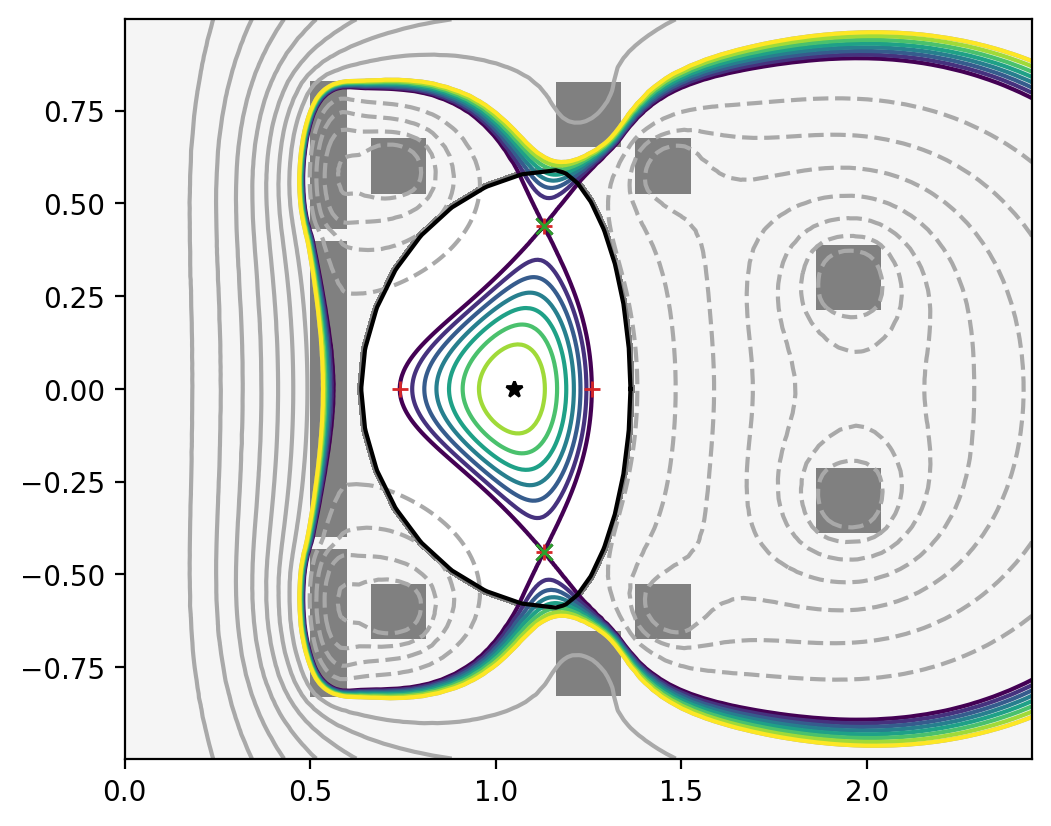

In [17]:
mygs.init_psi(1,0,0.25, 1.7,-0.5)
fig, ax = plt.subplots()
mygs.plot_psi(fig,ax)
mygs.plot_machine(fig,ax)
mygs.plot_constraints(fig,ax)

In [18]:
mygs.init_psi(1,0,0.25, 1.7,-0.5)
mygs.settings.maxits = 100
mygs.update_settings()
mygs.solve()

Starting non-linear GS solver
     1  1.1831E+01  5.4645E+00  4.5082E-02  1.0452E+00  2.6261E-05 -0.0000E+00
     2  1.2957E+01  6.0720E+00  1.1491E-02  1.0426E+00  1.1572E-05 -0.0000E+00
     3  1.3285E+01  6.2669E+00  3.0604E-03  1.0408E+00  5.7799E-06 -0.0000E+00
     4  1.3419E+01  6.3537E+00  1.0917E-03  1.0396E+00  1.5928E-06 -0.0000E+00
     5  1.3478E+01  6.3952E+00  5.3783E-04  1.0389E+00 -2.2904E-06 -0.0000E+00
     6  1.3503E+01  6.4154E+00  3.0507E-04  1.0384E+00 -5.8738E-06 -0.0000E+00
     7  1.3514E+01  6.4254E+00  1.7937E-04  1.0381E+00 -9.0488E-06 -0.0000E+00
     8  1.3519E+01  6.4303E+00  1.0623E-04  1.0379E+00 -1.1750E-05 -0.0000E+00
     9  1.3520E+01  6.4327E+00  6.2947E-05  1.0378E+00 -1.4012E-05 -0.0000E+00
    10  1.3521E+01  6.4339E+00  3.7263E-05  1.0378E+00 -1.5880E-05 -0.0000E+00
    11  1.3521E+01  6.4345E+00  2.2034E-05  1.0377E+00 -1.7402E-05 -0.0000E+00
    12  1.3520E+01  6.4348E+00  1.3016E-05  1.0377E+00 -1.8631E-05 -0.0000E+00
    13  1.3520E+01  6.

0

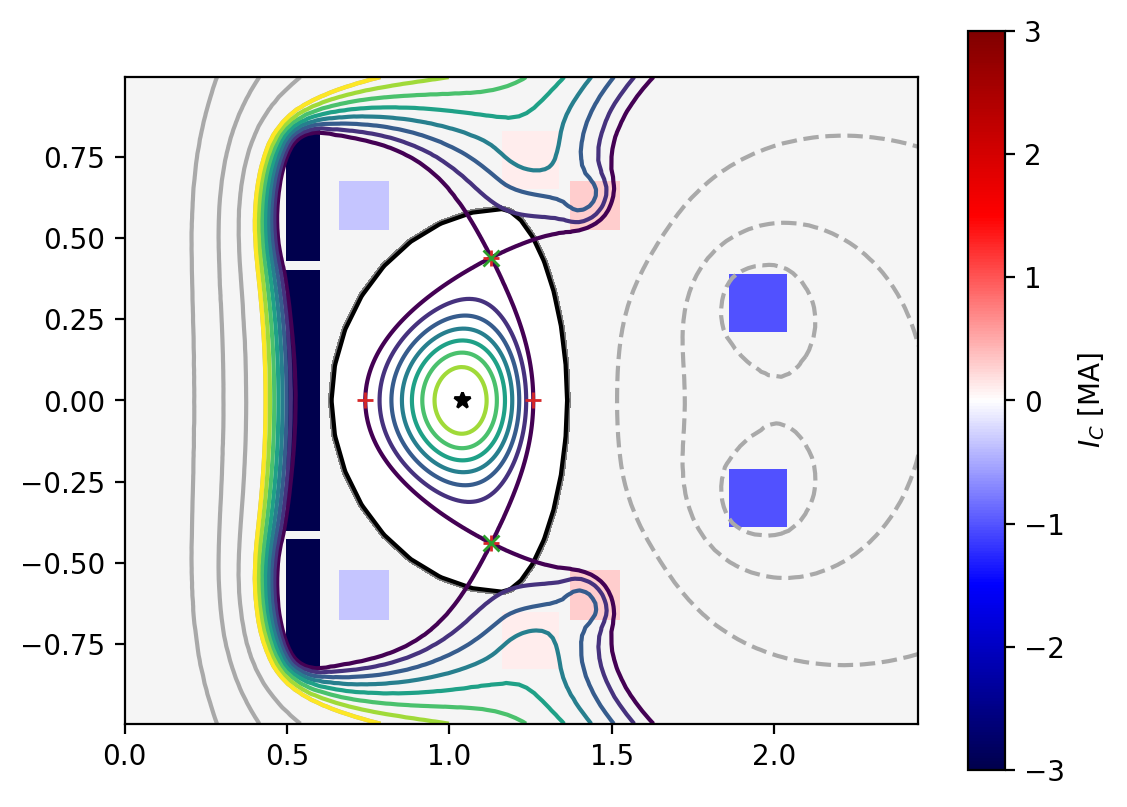

In [19]:
fig, ax = plt.subplots(1,1)
mygs.plot_machine(fig,ax,coil_colormap='seismic',coil_symmap=True,coil_scale=1.E-6,coil_clabel=r'$I_C$ [MA]')
mygs.plot_psi(fig,ax,xpoint_color=None,vacuum_nlevels=4)
mygs.plot_constraints(fig,ax)




Starting CG solver
     0  0.000000E+00  0.000000E+00  6.305987E+00
     1 -4.227580E+05  1.841950E+05  1.130507E+00  6.137554E-06
     2 -4.410414E+05  2.074973E+05  5.855533E-01  2.821981E-06
     3 -4.441360E+05  2.076801E+05  1.797708E-01  8.656136E-07
     4 -4.442797E+05  2.076491E+05  6.915821E-02  3.330533E-07
     5 -4.442994E+05  2.073399E+05  2.923481E-02  1.409994E-07
     6 -4.443018E+05  2.073566E+05  1.238859E-02  5.974533E-08
     7 -4.443023E+05  2.073547E+05  4.788048E-03  2.309110E-08
     8 -4.443023E+05  2.073697E+05  1.605438E-03  7.741910E-09
     9 -4.443023E+05  2.073713E+05  6.842072E-04  3.299431E-09
    10 -4.443024E+05  2.073717E+05  2.676795E-04  1.290820E-09
    20 -4.443024E+05  2.073715E+05  2.013139E-08  9.707887E-14
Growth rate = 1.3449E+03 [s^-1]
Growth time = 7.4355E-04 [s]


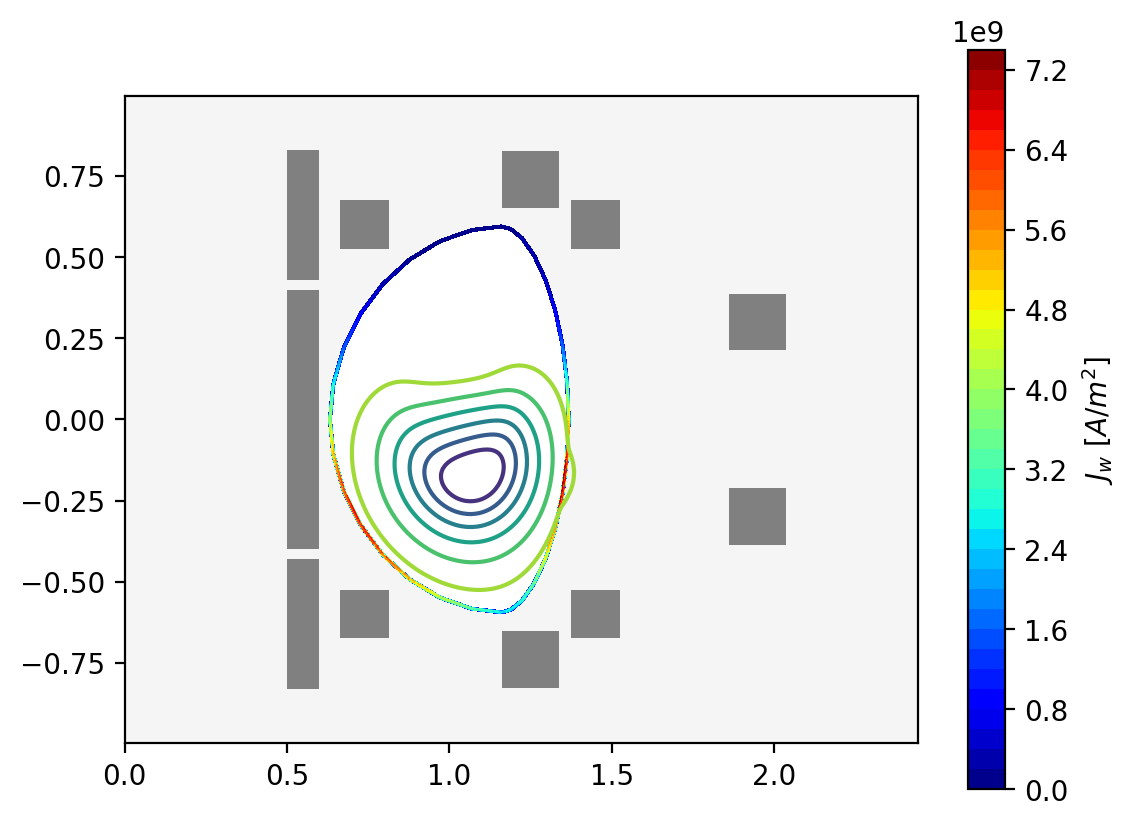

In [20]:
eig_vals, eig_vecs = mygs.eig_td(-5.E3,10,True) 
fig, ax = plt.subplots()
mygs.plot_machine(fig,ax,limiter_color=None)
mygs.plot_psi(fig,ax,eig_vecs[0,:],normalized=False,xpoint_color=None,opoint_color=None)
mygs.plot_eddy(fig,ax,-eig_vecs[0,:]*eig_vals[0,0])
print('Growth rate = {0:.4E} [s^-1]'.format(-eig_vals[0,0]))
print('Growth time = {0:.4E} [s]'.format(-1.0/eig_vals[0,0]))

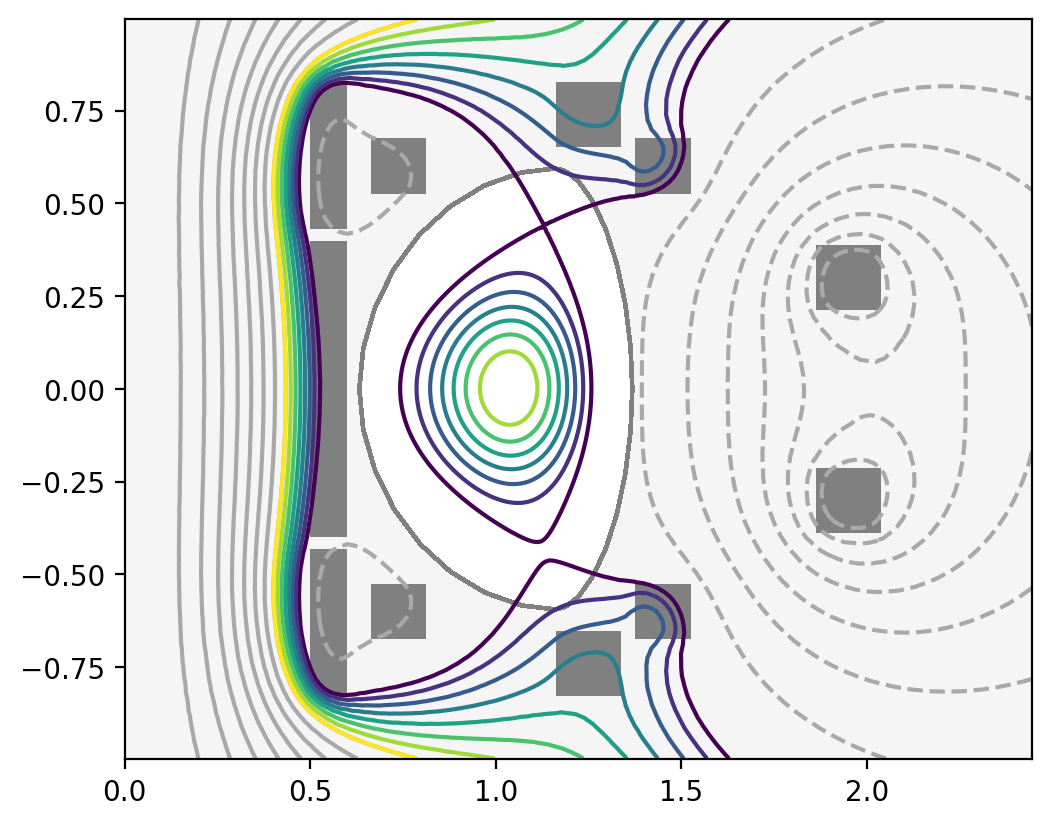

In [21]:
psi0 = mygs.get_psi(normalized = False)
max_loc = abs(eig_vecs[0,:]).argmax()
psi_ic = psi0-eig_vecs[0,:]*(mygs.psi_bounds[1]-mygs.psi_bounds[0])/eig_vecs[0,max_loc]/50

fig, ax = plt.subplots(1,1)
mygs.plot_machine(fig,ax,limiter_color=None)
mygs.plot_psi(fig,ax,(psi_ic-mygs.psi_bounds[1])/(mygs.psi_bounds[0]-mygs.psi_bounds[1]),xpoint_color=None,opoint_color=None)
mygs.set_psi(psi_ic)

In [22]:
mygs.settings.pm=False
mygs.update_settings()
mygs.set_isoflux(None)
mygs.set_targets(Ip=0.75E6,Ip_ratio=1)
mygs.setup_td(1.E-03,1.E-13,1.E-11,pre_plasma=False)

In [23]:
import time
sim_time = 0.0
dt = 1.E-1/-eig_vals[0,0]
nplot = 1
nstatus = 1
results = [mygs.get_psi()]
results_raw = [mygs.get_psi(False)]
z0 = [[sim_time,mygs.o_point[1]],]
eig_comp = [[sim_time,np.dot(eig_vecs[0,:],mygs.get_psi(normalized=False)-psi0)],]
t00 = time.perf_counter()
q_95 = []
gammas = []

for i in range(60):
    t0 = time.perf_counter()
    sim_time, _, nl_its, lin_its, nretry = mygs.step_td(sim_time,dt)
    t1 = time.perf_counter()
    if i % nstatus == 0:
        print('{0:.5E} {1:.5E} {2:4d} {3:4d} {5:8.3f} {4:4d}'.format(sim_time,dt,nl_its,lin_its,nretry,t1-t0))
    z0.append([sim_time,mygs.o_point[1]])
    eig_comp.append([sim_time,np.dot(eig_vecs[0,:],mygs.get_psi(normalized=False)-psi0)])
    q_prof = mygs.get_q()
    if i % nplot == 0:
        results.append(mygs.get_psi())
        results_raw.append(mygs.get_psi(False))
        psi,qvals,ravgs,dl,rbounds,zbounds = mygs.get_q(psi = 0.95)
        eig_vals, eig_vecs = mygs.eig_td(-5.E3,3,True) 
        gammas.append(-eig_vals[0,0])
        q_95.append(qvals[0])
t1 = time.perf_counter()
print('Total time = {0:8.3f}'.format(t1-t00))

7.43548E-05 7.43548E-05    2   18    0.429    0
1.48710E-04 7.43548E-05    2   14    0.201    0
2.23064E-04 7.43548E-05    2   13    0.190    0
2.97419E-04 7.43548E-05    2   12    0.184    0
3.71774E-04 7.43548E-05    2   16    0.233    0
4.46129E-04 7.43548E-05    2   15    0.218    0
5.20484E-04 7.43548E-05    2   15    0.223    0
5.94839E-04 7.43548E-05    2   15    0.311    0
6.69193E-04 7.43548E-05    2   16    0.245    0
7.43548E-04 7.43548E-05    2   16    0.235    0
8.17903E-04 7.43548E-05    2   16    0.224    0
8.92258E-04 7.43548E-05    2   16    0.223    0
9.66613E-04 7.43548E-05    2   16    0.227    0
1.04097E-03 7.43548E-05    2   15    0.212    0
1.11532E-03 7.43548E-05    2   16    0.234    0
1.18968E-03 7.43548E-05    2   17    0.246    0
1.26403E-03 7.43548E-05    2   17    0.866    0
1.33839E-03 7.43548E-05    2   17    0.275    0
1.41274E-03 7.43548E-05    2   17    0.283    0
1.48710E-03 7.43548E-05    2   17    0.242    0
1.56145E-03 7.43548E-05    2   17    0.2

Text(0, 0.5, '$\\gamma$')

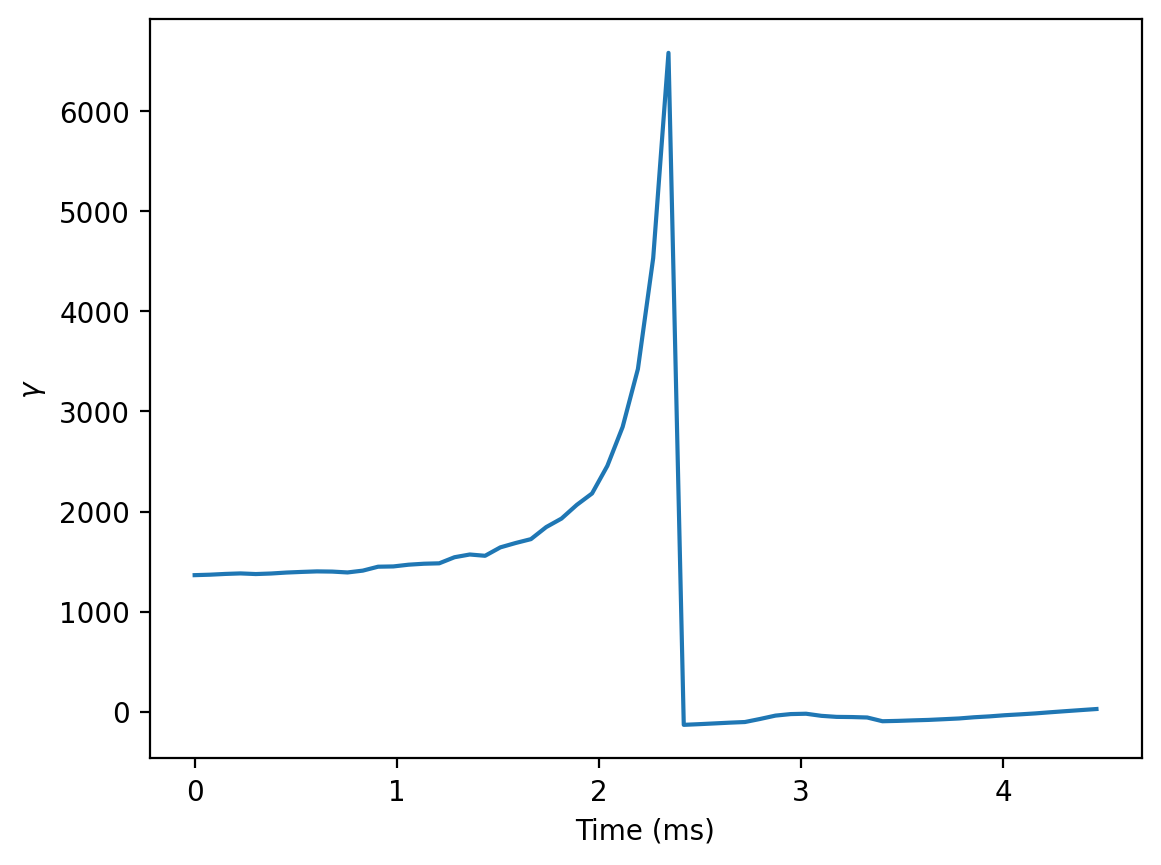

In [24]:
plt.plot(np.linspace(0,sim_time*1000, len(gammas)), gammas)
plt.xlabel('Time (ms)')
plt.ylabel(r'$\gamma$')

Text(0, 0.5, 'Z (m)')

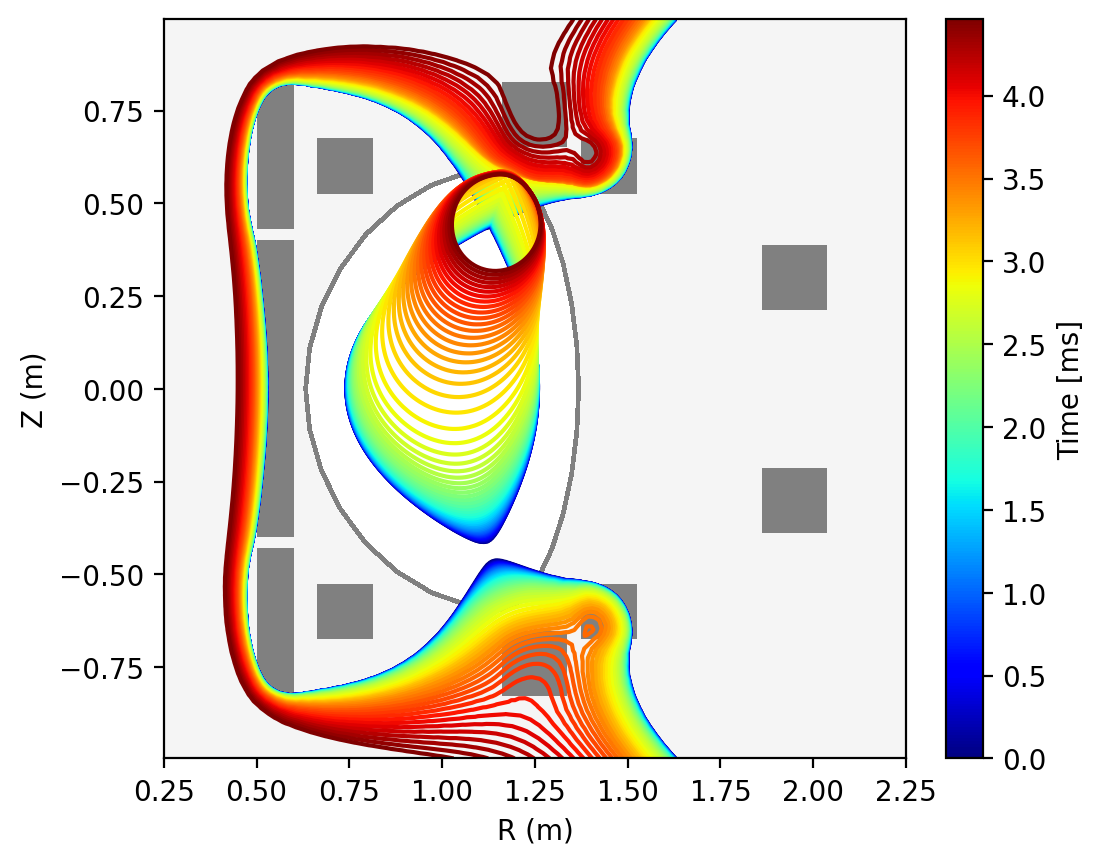

In [25]:
import matplotlib as mpl
fig, ax = plt.subplots()
mygs.plot_machine(fig,ax, limiter_color = None)
colors = plt.cm.jet(np.linspace(0,1,len(results)))
for i, result in enumerate(results):
    mygs.plot_psi(fig,ax,psi=result,plasma_nlevels=1,plasma_color=[colors[i]], vacuum_nlevels = 0,xpoint_color=None,opoint_color=None)
norm = mpl.colors.Normalize(vmin=0.0, vmax=sim_time*1.E3)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=plt.cm.jet), ax = ax,label='Time [ms]',fraction=0.046, pad=0.04)
plt.xlim([0.25, 2.25])
plt.xlabel('R (m)')
plt.ylabel('Z (m)')